<a href="https://colab.research.google.com/github/ankay212000/Data-Mining-and-Analysis-Practical/blob/main/Exercise7_UE183065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd /content/gdrive/My Drive/DMA Datasets

/content/gdrive/My Drive/DMA Datasets


In [4]:
ls

OnlineRetail.csv


In [41]:
import csv,codecs
from collections import defaultdict


unitprice=[]
unitprice_by_country=defaultdict(list)
unitprice_by_customer=defaultdict(list)
sales_yearly=defaultdict(list)
with codecs.open('OnlineRetail.csv',encoding='ISO-8859-1') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
      try: 
        unitprice.append(float(row[5]))
        unitprice_by_country[row[7]].append(float(row[5]))
        unitprice_by_customer[row[6]].append(float(row[5]))
        sales_yearly[int((row[4].split(" "))[0].split("/")[2])].append([int(row[3]),int((row[4].split(" "))[0].split("/")[0])])
      except:
        pass  

In [42]:
import numpy as np

unitprice=np.array(unitprice)
for i in unitprice_by_country.keys():
  unitprice_by_country[i]=np.array(unitprice_by_country[i])
for i in unitprice_by_customer.keys():
  unitprice_by_customer[i]=np.array(unitprice_by_customer[i])  

# **Find mean, std dev, min , max of unitprice field.**

In [43]:
print("mean of unitprice: ",np.mean(unitprice))
print("max of unitprice: ",np.max(unitprice))
print("min of unitprice: ",np.min(unitprice))
print("Standard deviation of unitprice: ",np.std(unitprice))

mean of unitprice:  4.611113626088513
max of unitprice:  38970.0
min of unitprice:  -11062.06
Standard deviation of unitprice:  96.75976378429183


# **Draw histogram of unitprice field using matplotlib**

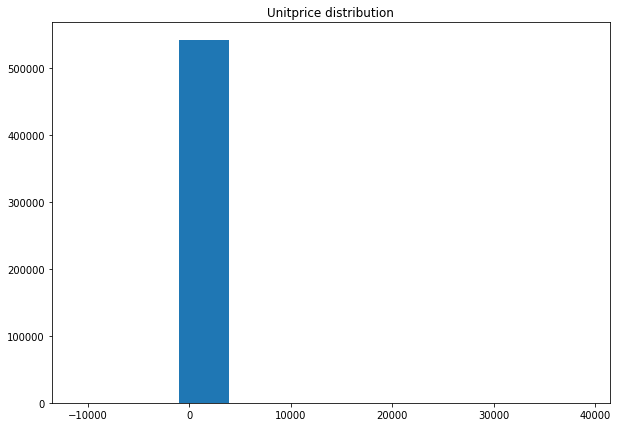

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(unitprice)
plt.title("Unitprice distribution")
plt.show()

# **Find mean of unitprice group by country and plot them**

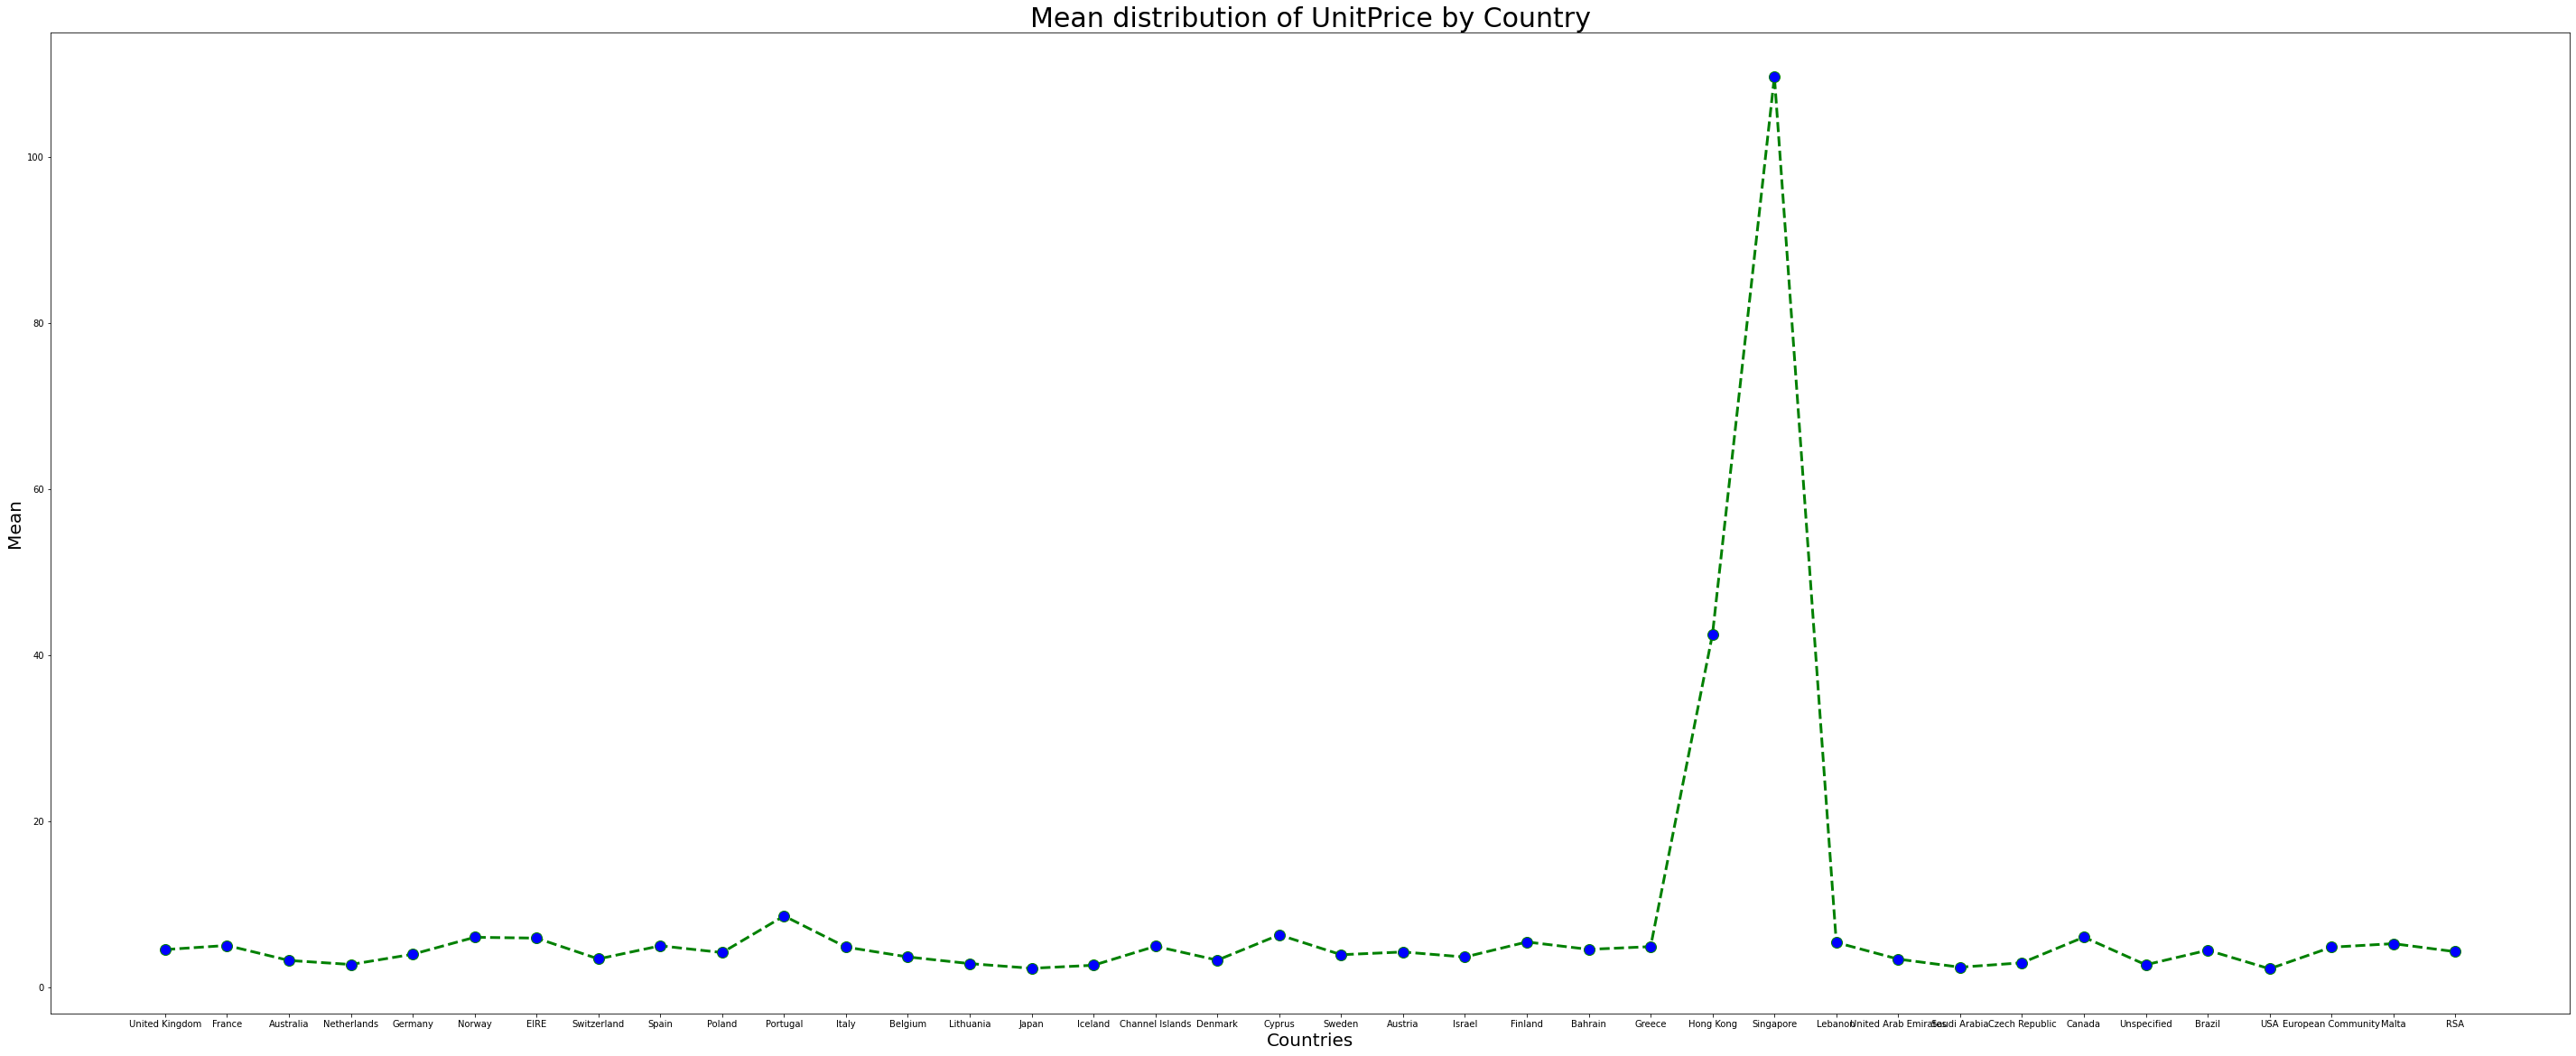

In [45]:
mean_unitprice_country=[]
countries=[]
for i in unitprice_by_country.keys():
  mean_unitprice_country.append(np.mean(unitprice_by_country[i]))
  countries.append(i)

fig, ax = plt.subplots(figsize =(50, 20))
plt.plot(countries, mean_unitprice_country, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel("Countries",fontsize=20)
plt.ylabel("Mean",fontsize=20)
plt.title("Mean distribution of UnitPrice by Country",fontsize=30)
plt.show()

# **Find min and max of unit price group by customerID**

In [46]:
print("Customer ID\tMax Unit Price\tMin Unit Price")
for i in unitprice_by_customer.keys():
  print(i,end="\t\t")
  print(np.min(unitprice_by_customer[i]),end="\t\t")
  print(np.max(unitprice_by_customer[i]))

Customer ID	Max Unit Price	Min Unit Price
17850		1.06		35.75
13047		0.42		14.95
12583		0.06		18.0
13748		0.39		14.95
15100		10.95		10.95
15291		0.29		45.0
14688		0.19		25.0
17809		0.21		717.23
15311		0.12		14.95
14527		0.19		80.0
16098		0.29		21.95
18074		0.65		12.75
17420		1.25		19.95
16029		0.2		8142.75
16250		0.42		7.95
12431		0.0		16.95
17511		0.1		16.95
17548		0.29		5.95
13705		0.65		165.0
13747		9.95		9.95
13408		0.29		110.43
13767		0.42		12.75
17924		0.29		8.5
13448		0.14		16.95
15862		0.16		16.95
15513		0.39		165.0
12791		1.85		15.0
16218		0.55		8.15
14045		1.65		8.5
14307		0.21		16.95
17908		0.12		7.95
17920		0.12		16.95
		-11062.06		17836.46
12838		0.29		16.95
13255		0.65		14.95
16583		1.25		4.95
18085		0.65		5.95
13758		0.21		16.95
13694		0.04		183.0
15983		0.42		10.4
14849		0.29		12.75
17968		0.29		7.95
16210		0.39		12.75
17897		0.29		39.95
17377		0.29		175.0
16552		0.29		12.75
17181		0.55		9.95
17951		0.29		12.75
14729		0.29		12.75
12748		0.0		1829.84
15012		0.39		12.75
12

In [47]:
year=[]
yearly_cum_sale=[]

sum=0
for i in sales_yearly.keys():
  year.append(i)
  for j in sales_yearly[i]: 
    sum+=j[0]
  yearly_cum_sale.append(sum)

In [48]:
print(year)
print(yearly_cum_sale)

[2010, 2011]
[342228, 5176450]


# **Find cumulative sales monthly and yearly and plot them**

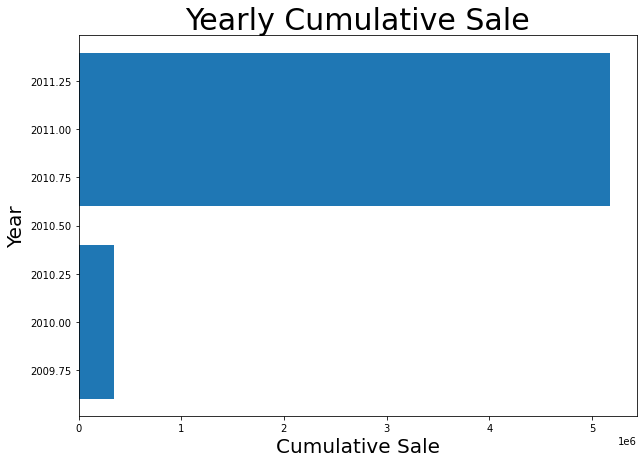

In [49]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.barh(year, yearly_cum_sale)
plt.xlabel("Cumulative Sale",fontsize=20)
plt.ylabel("Year",fontsize=20)
plt.title("Yearly Cumulative Sale",fontsize=30)
plt.show()

In [56]:
monthly10=[0]*12
monthly11=[0]*12

for i in sales_yearly.keys():
  if(i==2010):
    for j in sales_yearly[i]:
        monthly10[j[1]-1]+=j[0]  
  elif(i==2011):
    for j in sales_yearly[i]:
      monthly11[j[1]-1]+=j[0]

for i in range(1,12):
  monthly10[i]+=monthly10[i-1]
  monthly11[i]+=monthly11[i-1]

Months=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sept','Oct','Nov','Dec']  

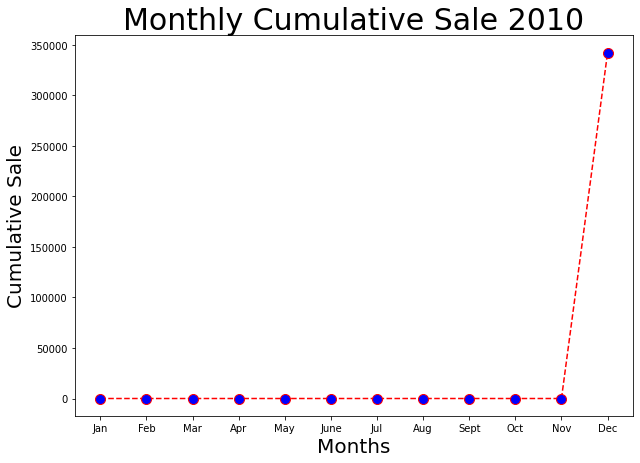

In [68]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.plot(Months, monthly10,marker='o',markerfacecolor='blue', markersize=10,linestyle='dashed',color="red")
plt.xlabel("Months",fontsize=20)
plt.ylabel("Cumulative Sale",fontsize=20)
plt.title("Monthly Cumulative Sale 2010",fontsize=30)
plt.show()

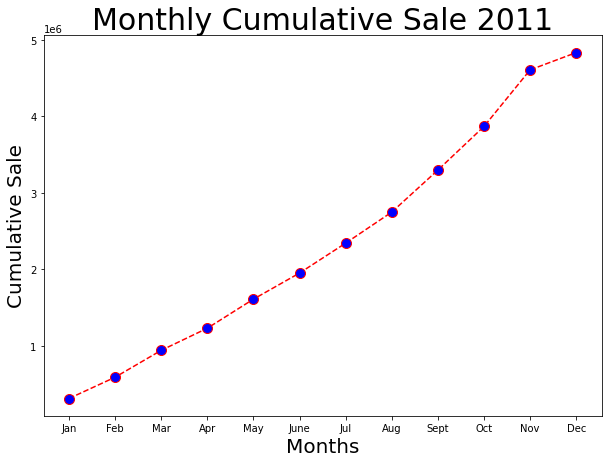

In [69]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.plot(Months, monthly11,marker='o',markerfacecolor='blue', markersize=10,linestyle="dashed",color="red")
plt.xlabel("Months",fontsize=20)
plt.ylabel("Cumulative Sale",fontsize=20)
plt.title("Monthly Cumulative Sale 2011",fontsize=30)
plt.show()

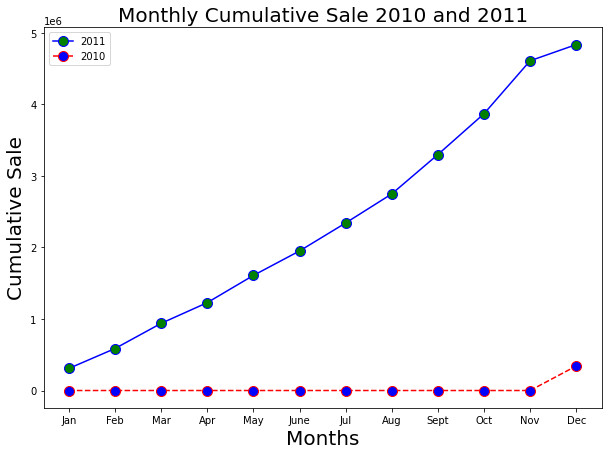

In [75]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.plot(Months, monthly11,marker='o',markerfacecolor='green', markersize=10,color="blue")
plt.plot(Months, monthly10,marker='o',markerfacecolor='blue', markersize=10,linestyle="dashed",color="red")
plt.legend([2011,2010])
plt.xlabel("Months",fontsize=20)
plt.ylabel("Cumulative Sale",fontsize=20)
plt.title("Monthly Cumulative Sale 2010 and 2011",fontsize=20)
plt.show()